In [4]:
from glob import glob
import matplotlib.pylab as plt
import sys
import os
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image

model = tf.keras.models.load_model('my_model.keras')





1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


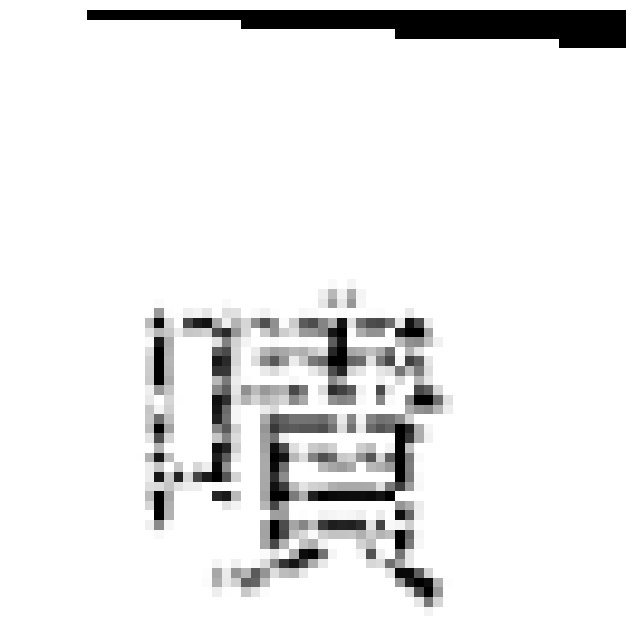

['嘖', '噴', '頃', '嗄', '賣', '墳', '喟', '咳', '壇', 'の']


In [5]:
path = f'/tmp/dcs-tmp.u2104990/dataset1/new-modified-dataset/0x5616/467514.png'


image = cv2.imread(path)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis('off')

sample = tf.keras.preprocessing.image.load_img(
    path=path,
    color_mode="grayscale",
    interpolation="laczos3",
    target_size=(64, 64),
    keep_aspect_ratio=True
)
sample = tf.keras.preprocessing.image.img_to_array(sample)
sample = sample.reshape((1,64,64,1))

prediction = model.predict(sample)[0]
ind = np.argpartition(prediction, -10)[-10:]

hex_labels = os.listdir("/tmp/dcs-tmp.u2104990/dataset1/new-modified-dataset/")
temp_hex_labels = sorted([chr(int(x,16)) for x in hex_labels])
q = [temp_hex_labels[i] for i in ind]

plt.show()
print([x for x in reversed(q)])


In [26]:
with open('label-map.txt', 'w') as f:
    f.write(f"val labelsMap = mapOf(\n")
    for i, label in enumerate(temp_hex_labels):
        f.write(f"{i} to \"{label}\",\n")
    f.write(")")

In [33]:
hex_labels = os.listdir("/dcs/large/u2104990/tmp2/new-modified-dataset/")

print(len(hex_labels))
print([a for a in hex_labels if chr(int(a, 16)) == 'あ'])

6512
['0x3042']
